# Intent
Provide an interface for creating families of related or dependent objects without
specifying their concrete classes. 
# Motivation
Abstract Factory defines an interface for creating all distinct products but leaves the actual product creation to concrete factory classes. Each factory type corresponds to a certain product variety.

The client code calls the creation methods of a factory object instead of creating products directly with a constructor call (new operator). Since a factory corresponds to a single product variant, all its products will be compatible.

Client code works with factories and products only through their abstract interfaces. This lets the client code work with any product variants, created by the factory object. You just create a new concrete factory class and pass it to the client code.
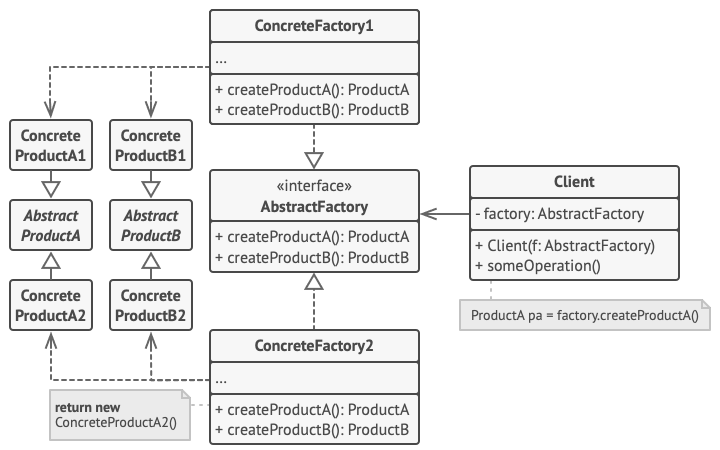
# Use the Factory pattern when
• a system should be independent of how its products are created, composed, and
represented. \
• a system should be configured with one of multiple families of products. \
• a family of related product objects is designed to be used together, and you need
to enforce this constraint. \
• you want to provide a class library of products, and you want to reveal just their
interfaces, not their implementations. 

In [3]:
"""
Basic video exporting example
"""

import pathlib
from abc import ABC, abstractmethod


class VideoExporter(ABC):
    """Basic representation of video exporting codec."""

    @abstractmethod
    def prepare_export(self, video_data):
        """Prepares video data for exporting."""

    @abstractmethod
    def do_export(self, folder: pathlib.Path):
        """Exports the video data to a folder."""


class LosslessVideoExporter(VideoExporter):
    """Lossless video exporting codec."""

    def prepare_export(self, video_data):
        print("Preparing video data for lossless export.")

    def do_export(self, folder: pathlib.Path):
        print(f"Exporting video data in lossless format to {folder}.")


class H264BPVideoExporter(VideoExporter):
    """H.264 video exporting codec with Baseline profile."""

    def prepare_export(self, video_data):
        print("Preparing video data for H.264 (Baseline) export.")

    def do_export(self, folder: pathlib.Path):
        print(f"Exporting video data in H.264 (Baseline) format to {folder}.")


class H264Hi422PVideoExporter(VideoExporter):
    """H.264 video exporting codec with Hi422P profile (10-bit, 4:2:2 chroma sampling)."""

    def prepare_export(self, video_data):
        print("Preparing video data for H.264 (Hi422P) export.")

    def do_export(self, folder: pathlib.Path):
        print(f"Exporting video data in H.264 (Hi422P) format to {folder}.")


class AudioExporter(ABC):
    """Basic representation of audio exporting codec."""

    @abstractmethod
    def prepare_export(self, audio_data):
        """Prepares audio data for exporting."""

    @abstractmethod
    def do_export(self, folder: pathlib.Path):
        """Exports the audio data to a folder."""


class AACAudioExporter(AudioExporter):
    """AAC audio exporting codec."""

    def prepare_export(self, audio_data):
        print("Preparing audio data for AAC export.")

    def do_export(self, folder: pathlib.Path):
        print(f"Exporting audio data in AAC format to {folder}.")


class WAVAudioExporter(AudioExporter):
    """WAV (lossless) audio exporting codec."""

    def prepare_export(self, audio_data):
        print("Preparing audio data for WAV export.")

    def do_export(self, folder: pathlib.Path):
        print(f"Exporting audio data in WAV format to {folder}.")


class ExporterFactory(ABC):
    """
    Factory that represents a combination of video and audio codecs.
    The factory doesn't maintain any of the instances it creates.
    """

    @abstractmethod
    def get_video_exporter(self) -> VideoExporter:
        """Returns a new video exporter belonging to this factory."""

    @abstractmethod
    def get_audio_exporter(self) -> AudioExporter:
        """Returns a new audio exporter belonging to this factory."""


class FastExporter(ExporterFactory):
    """Factory aimed at providing a high speed, lower quality export."""

    def get_video_exporter(self) -> VideoExporter:
        return H264BPVideoExporter()

    def get_audio_exporter(self) -> AudioExporter:
        return AACAudioExporter()


class HighQualityExporter(ExporterFactory):
    """Factory aimed at providing a slower speed, high quality export."""

    def get_video_exporter(self) -> VideoExporter:
        return H264Hi422PVideoExporter()

    def get_audio_exporter(self) -> AudioExporter:
        return AACAudioExporter()


class MasterQualityExporter(ExporterFactory):
    """Factory aimed at providing a low speed, master quality export."""

    def get_video_exporter(self) -> VideoExporter:
        return LosslessVideoExporter()

    def get_audio_exporter(self) -> AudioExporter:
        return WAVAudioExporter()


In [5]:
def read_factory() -> ExporterFactory:
    """Constructs an exporter factory based on the user's preference."""

    factories = {
        "low": FastExporter(),
        "high": HighQualityExporter(),
        "master": MasterQualityExporter(),
    }
    while True:
        export_quality = input("Enter desired output quality (low, high, master): ")
        if export_quality in factories:
            return factories[export_quality]
        print(f"Unknown output quality option: {export_quality}.")

factory = read_factory()

# retrieve the exporters
video_exporter = factory.get_video_exporter()
audio_exporter = factory.get_audio_exporter()

# prepare the export
video_exporter.prepare_export("placeholder_for_video_data")
audio_exporter.prepare_export("placeholder_for_audio_data")

# do the export
folder = pathlib.Path("/usr/tmp/video")
video_exporter.do_export(folder)
audio_exporter.do_export(folder)

Preparing video data for H.264 (Baseline) export.
Preparing audio data for AAC export.
Exporting video data in H.264 (Baseline) format to /usr/tmp/video.
Exporting audio data in AAC format to /usr/tmp/video.
